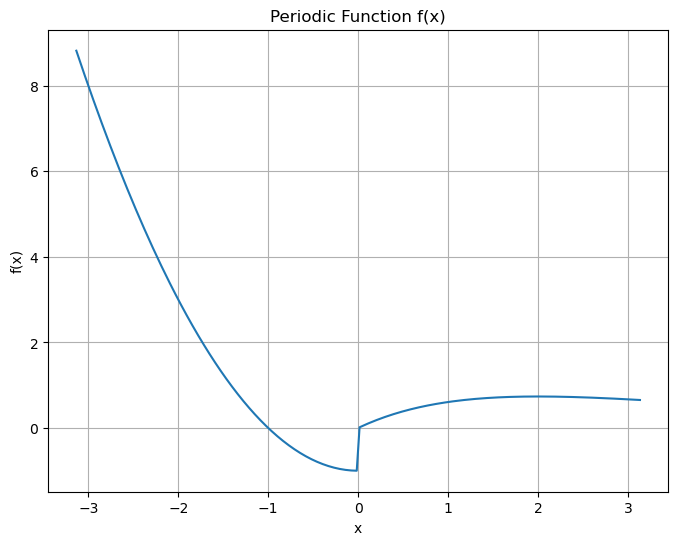

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

def f(x):
    if -np.pi <= x<0: #defining the function and the range from -pi to 0
        return x**2 - 1;
    elif 0 <= x <= np.pi: #second function with the range 
        return x * np.exp(-x/2)
    else:
        return None
    
#Plotting the periodic function f(x) over the domain

x = np.linspace(-2*np.pi, 2*np.pi, 400)#creates 400 evenly spaced values between -2pi to 2pi in an array

#uses a list comprehension where it loops through each xi value in x array and calculates the corresponding y 
#value by calling the function f(xi)
y = [f(xi) for xi in x]

plt.figure(figsize=(8, 6)) #creates a figure plot of 6 x 8 inches
plt.plot(x, y) #creates the plot of the periodic function
plt.title("Periodic Function f(x)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.show()

In [4]:
def a(n, L):
    def g(x):
        return f(x) * np.cos((n * np.pi * x) / L)
    integral, error = quad(g, -L, L)
    return (1 / L) * integral

def b(n, L):
    def g(x):
        return f(x) * np.sin((n * np.pi * x) / L)
    integral, error = quad(g, -L, L)
    return (1 / L) * integral

# c) Plot the obtained Fourier series expansion
def Sf(x, N, L):
    a0 = a(0, L)
    sum = np.array([((a(n, L) * np.cos((n * np.pi * x) / L)) + (b(n, L) * np.sin((n * np.pi * x) / L))) for n in range(1, N+1)])
    return (a0 / 2) + sum.sum()

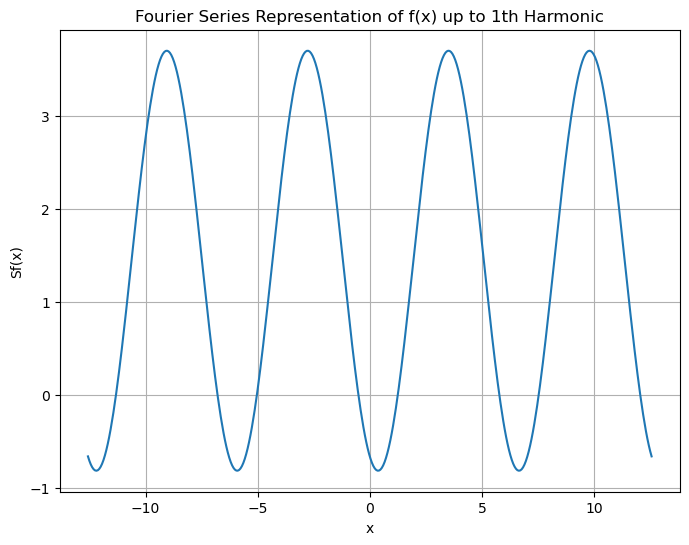

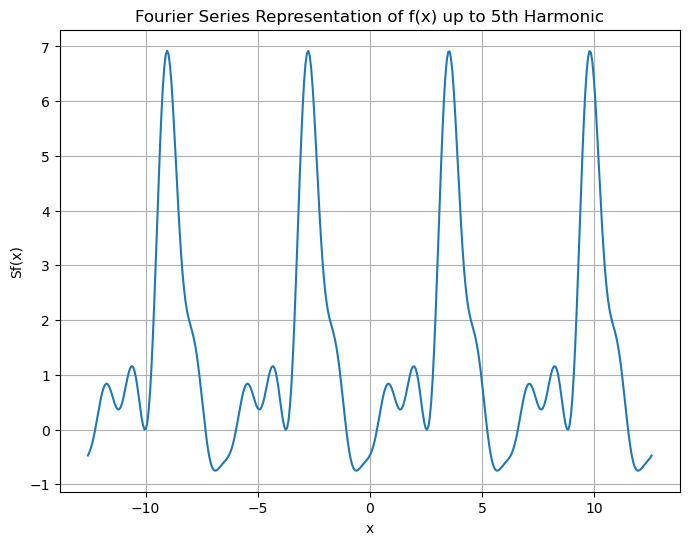

C:\Users\USER\AppData\Local\Temp\ipykernel_13924\4213331980.py:4: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  integral, error = quad(g, -L, L)
C:\Users\USER\AppData\Local\Temp\ipykernel_13924\4213331980.py:10: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the inte

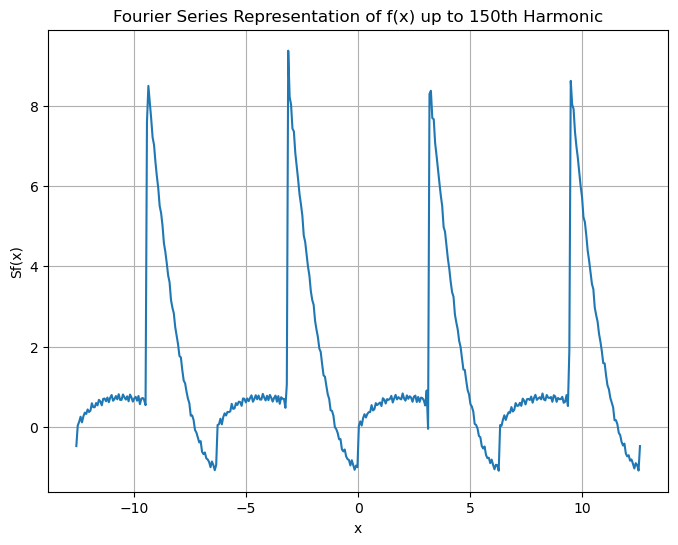

In [5]:
# Plotting the Fourier series representation
N_values = [1, 5, 150]
x = np.linspace(-4*np.pi, 4*np.pi, 400)
for N in N_values:
    y = [Sf(xi, N, np.pi) for xi in x]
    plt.figure(figsize=(8, 6))
    plt.plot(x, y)
    plt.title(f"Fourier Series Representation of f(x) up to {N}th Harmonic")
    plt.xlabel("x")
    plt.ylabel("Sf(x)")
    plt.grid(True)
    plt.show()


In [6]:
def RMSE(x, N, L):
    y_actual = np.array([f(xi) for xi in x])
    y_predicted = np.array([Sf(xi, N, L) for xi in x])
    return np.sqrt(((y_actual - y_predicted) ** 2).mean())

# Plotting the RMSE
N_values = range(151)
x = np.linspace(-4*np.pi, 4*np.pi, 400)
errors = [RMSE(x, N, np.pi) for N in N_values]
plt.figure(figsize=(8, 6))
plt.plot(N_values, errors)
plt.title("Root Mean Square Error (RMSE) between f(x) and its Harmonics")
plt.xlabel("Harmonic")
plt.ylabel("RMSE")
plt.grid(True)
plt.show()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'